In [45]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df = pd.read_parquet('data/mbti_1.pqt')
print(df.head(10))
print(df.info())


  label                                               text  is_valid
0  ISFP  'He sounds like he likes you, if you really wa...     False
1  INTJ  'I saved a dog's life today in the most cliche...     False
2  INFP  'https://www.youtube.com/watch?time_continue=2...     False
3  ENTP  'Tell me about it!!|||When I apologised for up...      True
4  INTJ  'If you ever meet someone you get along with i...     False
5  INFJ  'https://i.chzbgr.com/completestore/12/9/12/4J...      True
6  ISFP  'I'm lovin' this. The live chat is hilarious. ...     False
7  INFJ  'Not true. I have contacts whom I have contact...     False
8  INFP  The bulk of humanity is just evil.....I want m...     False
9  INTP  'keep it coming, people this entp interaction ...      True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
label       8675 non-null object
text        8675 non-null object
is_valid    8675 non-null bool
dtypes: bool(1), object(2)
memory usag

In [46]:
df['words_per_comment'] = df['text'].apply(lambda x: len(x.split())/50)
df['http_per_comment'] = df['text'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['text'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['text'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['text'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['text'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['text'].apply(lambda x: x.count('...')/50)
df['comma_per_comment'] = df['text'].apply(lambda x: x.count(',')/50)
df.head()

,label,text,is_valid,words_per_comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment,comma_per_comment
0,ISFP,"'He sounds like he likes you, if you really wa...",False,28.00,0.06,0.04,0.08,0.00,0.04,0.48,1.56
1,INTJ,'I saved a dog's life today in the most cliche...,False,23.48,0.12,0.00,0.14,0.04,0.00,0.78,1.28
2,INFP,'https://www.youtube.com/watch?time_continue=2...,False,15.24,0.30,0.04,0.52,0.00,0.16,0.24,0.88
3,ENTP,'Tell me about it!!|||When I apologised for up...,True,29.92,0.02,0.02,0.06,0.00,0.38,0.96,0.60
4,INTJ,'If you ever meet someone you get along with i...,False,15.08,0.70,0.02,0.70,0.02,0.08,0.40,0.96


/home/dainis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

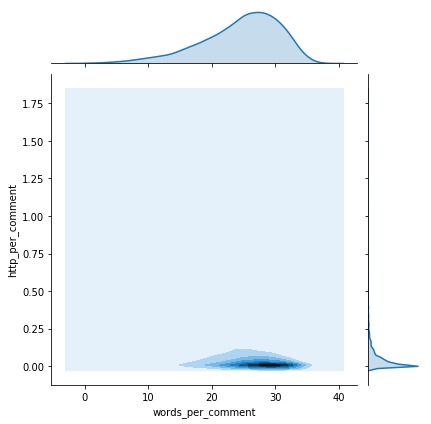

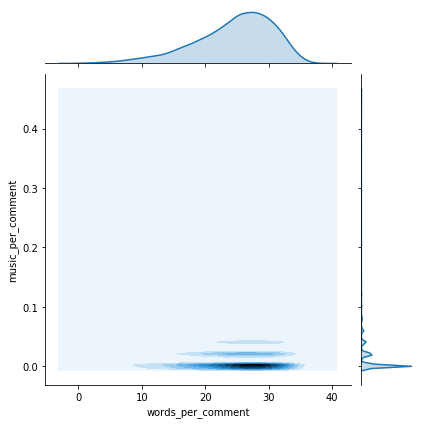

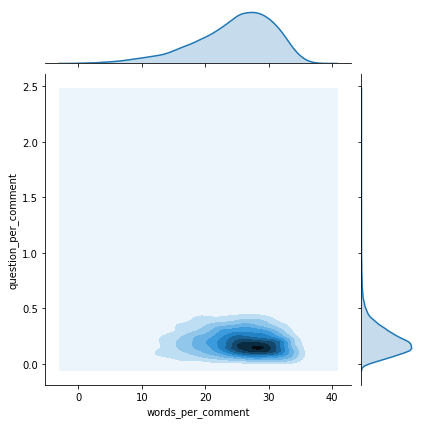

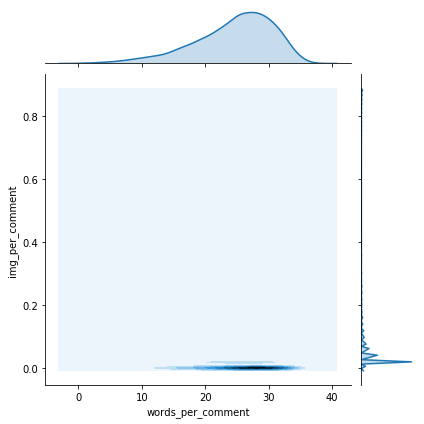

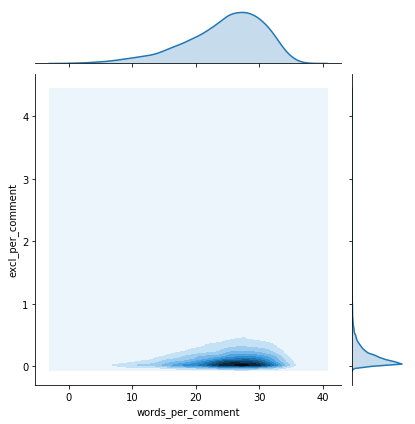

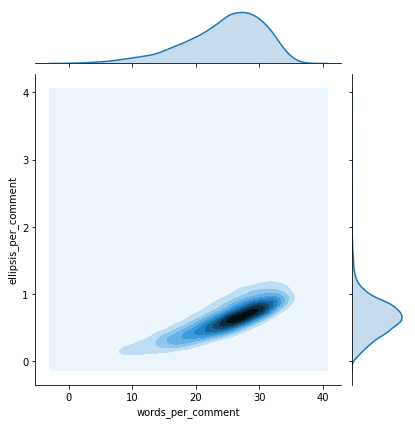

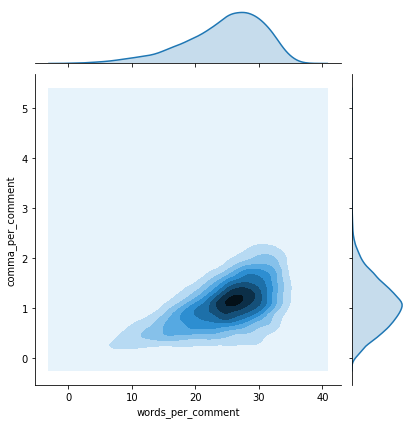

In [47]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='http_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='music_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='question_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='img_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='excl_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')
sns.jointplot(x='words_per_comment', y='comma_per_comment', data=df, kind='kde')

0.7239129106930459
0.741836096776579
0.7223598412495943
0.705411470476091
0.639982031953954
0.641741709999527
0.6421043831098796
0.6701370930896872
0.7305845421989157
0.9047732695678704
0.7979480156944374
0.7423804864273491
[0.9047732695678704, 0.7979480156944374, 0.7423804864273491, 0.741836096776579, 0.7305845421989157, 0.7239129106930459, 0.7223598412495943, 0.705411470476091, 0.6701370930896872, 0.6421043831098796, 0.641741709999527, 0.639982031953954]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ESTJ', 'ESFJ']


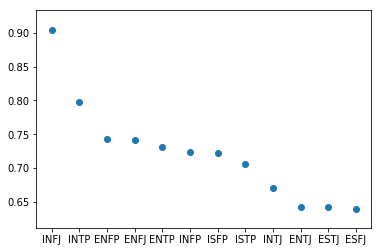

In [48]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

0.626780166253987
0.5832090080218444
0.5524914125984627
0.5213116828510341
0.5248752600489962
0.5735353926089561
0.49519586917496305
0.5362434465195006
0.5942782302912534
0.6297875797919695
0.4463890775695336
0.5521820131557013
[0.6297875797919695, 0.626780166253987, 0.5942782302912534, 0.5832090080218444, 0.5735353926089561, 0.5524914125984627, 0.5521820131557013, 0.5362434465195006, 0.5248752600489962, 0.5213116828510341, 0.49519586917496305, 0.4463890775695336]
['ESTJ', 'ENFP', 'ENTP', 'INFJ', 'ENFJ', 'ENTJ', 'INFP', 'INTP', 'INTJ', 'ISTP', 'ISFP', 'ESFJ']


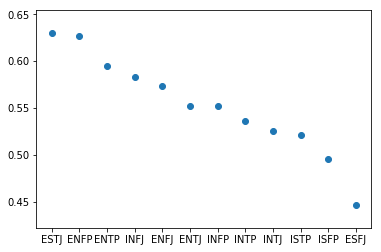

In [49]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['comma_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

-0.4412631571983905
-0.38387905869453504
-0.44790324010760374
-0.32322929968665637
-0.46973778684960804
-0.443738460715023
-0.33397053940902227
-0.3922894943391376
-0.4403609599011288
-0.22821019503804293
-0.479452222114812
-0.4103412859647169
[-0.22821019503804293, -0.32322929968665637, -0.33397053940902227, -0.38387905869453504, -0.3922894943391376, -0.4103412859647169, -0.4403609599011288, -0.4412631571983905, -0.443738460715023, -0.44790324010760374, -0.46973778684960804, -0.479452222114812]
['ESTJ', 'INFJ', 'INFP', 'INTP', 'ISFP', 'ISTP', 'ENTJ', 'ENFJ', 'INTJ', 'ENFP', 'ENTP', 'ESFJ']


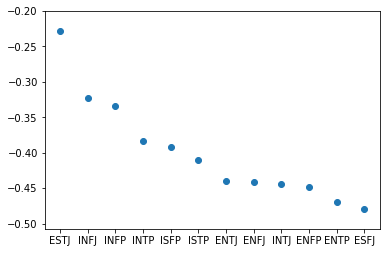

In [50]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['http_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

0.027744856587425103
0.04933012697911608
0.03832491345421324
0.10786188688932347
0.04570724680836787
0.07550120097302282
0.005605457260403488
0.13766524032361335
-0.04613520774304308
0.05015840677098754
0.1426506002937365
0.02463424444423728
[0.1426506002937365, 0.13766524032361335, 0.10786188688932347, 0.07550120097302282, 0.05015840677098754, 0.04933012697911608, 0.04570724680836787, 0.03832491345421324, 0.027744856587425103, 0.02463424444423728, 0.005605457260403488, -0.04613520774304308]
['ISTP', 'ENFP', 'ENTJ', 'ISFP', 'INFP', 'INFJ', 'INTJ', 'ESFJ', 'INTP', 'ENTP', 'ENFJ', 'ESTJ']


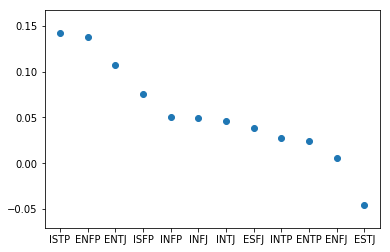

In [51]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['music_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

-0.11194966485163384
-0.06489290646518699
-0.1850031724169325
0.0015954284011220595
-0.20059983087581515
-0.1675353752750199
-0.02598583880022979
0.05046542041629766
-0.19388067263924413
0.03680433680602252
-0.08181160565667314
0.025116115218628297
[0.05046542041629766, 0.03680433680602252, 0.025116115218628297, 0.0015954284011220595, -0.02598583880022979, -0.06489290646518699, -0.08181160565667314, -0.11194966485163384, -0.1675353752750199, -0.1850031724169325, -0.19388067263924413, -0.20059983087581515]
['INFJ', 'ISTP', 'INFP', 'INTP', 'ISFP', 'ESTJ', 'INTJ', 'ENFP', 'ENTP', 'ENTJ', 'ESFJ', 'ENFJ']


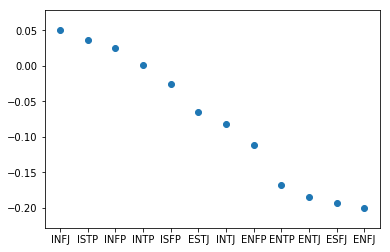

In [52]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['question_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

0.1113305792983445
-0.038816566785915094
0.08214719503143689
0.016170837972113484
0.021628503498021423
-0.007840388694110084
0.004814924760558115
0.026464970086457006
0.022053814558898762
0.16497864004488358
-0.017230061918081564
-0.058849037674061785
[0.16497864004488358, 0.1113305792983445, 0.08214719503143689, 0.026464970086457006, 0.022053814558898762, 0.021628503498021423, 0.016170837972113484, 0.004814924760558115, -0.007840388694110084, -0.017230061918081564, -0.038816566785915094, -0.058849037674061785]
['ENTJ', 'INTJ', 'ESTJ', 'INTP', 'ENFP', 'ENTP', 'INFJ', 'ISTP', 'ENFJ', 'INFP', 'ISFP', 'ESFJ']


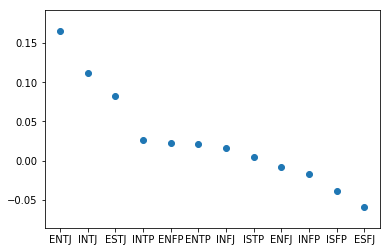

In [53]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['excl_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

-0.18194031630459018
-0.27126194419548544
-0.2257001173371099
-0.2036476140373074
-0.23883649925355688
-0.24704890575970997
-0.14491406391640035
-0.2969477754830165
-0.21397309805054818
-0.04609667841186007
-0.36871815669494995
-0.310848477058442
[-0.04609667841186007, -0.14491406391640035, -0.18194031630459018, -0.2036476140373074, -0.21397309805054818, -0.2257001173371099, -0.23883649925355688, -0.24704890575970997, -0.27126194419548544, -0.2969477754830165, -0.310848477058442, -0.36871815669494995]
['ESTJ', 'ENTJ', 'ENFJ', 'INTJ', 'INTP', 'INFJ', 'INFP', 'ISTP', 'ENTP', 'ISFP', 'ENFP', 'ESFJ']


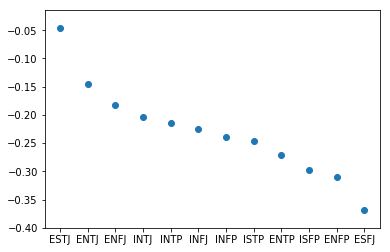

In [54]:
i = df['label'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['label'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['img_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

In [58]:

X_train = df[df['is_valid'] == False]
y_train = X_train['label']
X_test = df[df['is_valid'] == True]
y_test = X_test['label']
print(len(X_train), len(X_test))

6940 1735


In [59]:

X_train = X_train.drop(['label','text','is_valid'], axis=1)
X_test = X_test.drop(['label','text', 'is_valid'], axis=1)
X_train.head()

,words_per_comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment,comma_per_comment
0,28.00,0.06,0.04,0.08,0.00,0.04,0.48,1.56
1,23.48,0.12,0.00,0.14,0.04,0.00,0.78,1.28
2,15.24,0.30,0.04,0.52,0.00,0.16,0.24,0.88
4,15.08,0.70,0.02,0.70,0.02,0.08,0.40,0.96
6,20.62,0.14,0.04,0.34,0.02,0.08,0.56,0.62


In [61]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

19.25 %
